**Written and Directed by:** *Κωστόπουλος Κωνσταντίνος 03117043*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει ταινίες σε χρήστες.


## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πως μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο lotr.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες

```xml
<http://example.org/ns/tt0325980> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Astin> .
<http://example.org/ns/tt0325980> <http://example.org/props/director> <http://example.org/ns/Gore_Verbinski> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Cate_Blanchett> .
<http://example.org/ns/tt0120737> <http://example.org/props/budget> "$ 93000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/New_Zealand> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sala_Baker> .
<http://example.org/ns/tt0325980> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Bean> .
<http://example.org/ns/tt0120737> <http://example.org/props/director> <http://example.org/ns/Peter_Jackson> .
<http://example.org/ns/tt0325980> <http://example.org/props/budget> "$ 140000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0325980> <http://example.org/props/title> "Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/tt0120737> <http://example.org/props/title> "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^<http://www.w3.org/2001/XMLSchema#string> .
```
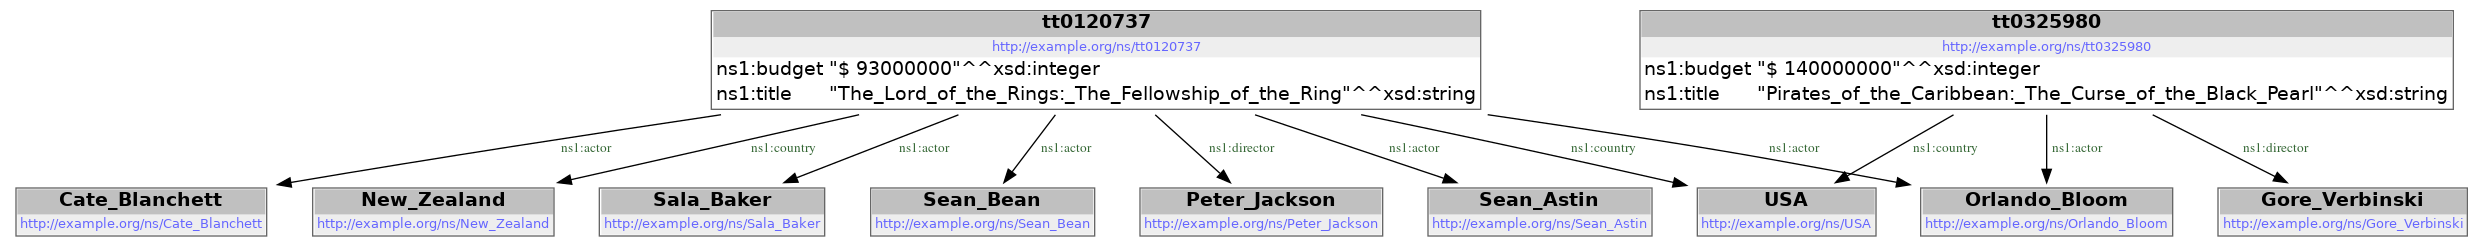




Ο γράφος αυτός περιέχει πληροφορίες για δύο ταινίες, την τοποθεσία που γυρίστηκαν, το σκηνοθέτη τους και κάποιους από τους ηθοποιούς. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [1]:
!pip install rdflib

In [2]:
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('lotr.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)
for (s,p,o) in g:
  print(s,p,o)

All nodes of the graph:
http://example.org/ns/Sala_Baker
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
http://example.org/ns/Cate_Blanchett
$ 140000000
http://example.org/ns/USA
http://example.org/ns/Gore_Verbinski
$ 93000000
http://example.org/ns/Sean_Bean
http://example.org/ns/tt0120737
http://example.org/ns/Orlando_Bloom
http://example.org/ns/Peter_Jackson
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
http://example.org/ns/tt0325980
http://example.org/ns/New_Zealand
http://example.org/ns/Sean_Astin
http://example.org/ns/tt0325980 http://example.org/props/director http://example.org/ns/Gore_Verbinski
http://example.org/ns/tt0325980 http://example.org/props/budget $ 140000000
http://example.org/ns/tt0325980 http://example.org/props/actor http://example.org/ns/Orlando_Bloom
http://example.org/ns/tt0120737 http://example.org/props/budget $ 93000000
http://example.org/ns/tt0120737 http://example.org/props/country http://example.org/ns/USA
http://example.org/ns/tt0120737 http

Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Σε ποιες ταινίες παίζει ο Orlando Bloom?

In [3]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα

##δουλεύει και χωρίς distinct προφανώς.
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?movie exp:actor ex:Orlando_Bloom .
          ?movie exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Ian McKellen παίζει στο Lord of the Rings

In [4]:
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI της ταινίας
a = URIRef(ns1+"tt0120737")

## URI της ιδιότητας "έχει ηθοποιό"
b = URIRef(ns2+"actor")

## URI του Ian McKellen
c = URIRef(ns1+"Ian_McKellen")

## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Sala_Baker
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
http://example.org/ns/Cate_Blanchett
$ 140000000
http://example.org/ns/USA
$ 93000000
http://example.org/ns/Gore_Verbinski
http://example.org/ns/Sean_Bean
http://example.org/ns/tt0120737
http://example.org/ns/Orlando_Bloom
http://example.org/ns/Peter_Jackson
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
http://example.org/ns/Ian_McKellen
http://example.org/ns/tt0325980
http://example.org/ns/New_Zealand
http://example.org/ns/Sean_Astin


Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα της ταινίας έχει URI <<http://example.org/ns/tt0120737>> και όχι <<http://example.org/ns/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring>>. Ο τίτλος μιας ταινίας είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [5]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:title "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt0120737'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο διαδίκτυο, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο ταινίες διαφορετικές από αυτές που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας ηθοποιός ή ένας σκηνοθέτης) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο lotr.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

In [6]:
## Solution 1.1

g2 = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g2.parse('mygraph.nt',format='nt')
print("All nodes of the graph:")
for node in g2.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/South_Korea
http://example.org/ns/Noah_Baumbach
http://example.org/ns/Bong_Joon_Ho
Marriage_Story
http://example.org/ns/tt1727824
http://example.org/ns/Adam_Driver
http://example.org/ns/Sean_Bean
http://example.org/ns/Bryan_Singer
Bohemian_Rhapsody
http://example.org/ns/tt1181791
http://example.org/ns/Germany
Parasite
Black_Death
http://example.org/ns/Rami_Malek
http://example.org/ns/tt6751668
http://example.org/ns/tt7653254
http://example.org/ns/USA
http://example.org/ns/UK
http://example.org/ns/Song_Kang_Ho
http://example.org/ns/Christopher_Smith


In [7]:
##SPARQL query 1

##Επιλέγει τον κόμβο-θέμα που αντιστοιχεί στην ταινία Parasite μέσω της ακμής <http://example.org/props/>

ans=g2.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie
       WHERE {
          ?movie exp:title "Parasite"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt6751668'),)


In [8]:
##SPARQL query 2

##Επιλέγει τον κόμβο που αντιστοιχεί στην ταινία Parasite μέσω της ακμής <http://example.org/props/> και, στη συνέχεια, επιλέγει 
##ηθοποιό που παίζει στην ταινία.

ans=g2.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie ?actor
       WHERE {
          ?movie exp:title "Parasite"^^xsd:string .
          ?movie exp:actor ?actor .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt6751668'), rdflib.term.URIRef('http://example.org/ns/Song_Kang_Ho'))


### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, lotr.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [9]:
## Solution 1.2

g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')


#Το παρακάτω query μάς δείχνει ότι οι γράφοι g1, g2 είναι πράγματι συνδεδεμένοι. Επιλέγοντας όλες τις ταινίες στις οποίες συμμετείχε ο 
# Sean Bean, παίρνω ως αποτέλεσμα τόσο την Lord of the Rings ταινία (g1 graph), όσο και την Black Death (g2)

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie
       WHERE {
          ?movie exp:actor ex:Sean_Bean .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt0120737'),)
(rdflib.term.URIRef('http://example.org/ns/tt1181791'),)


## 2o Μέρος: Ανάπτυξη γράφου γνώσης



Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο movies.csv που σας δίνεται, το οποίο είναι υποσύνολο του kaggle dataset που βρίσκεται [εδώ](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

In [10]:
import pandas as pd
df = pd.read_csv('movies.csv')
#print(df.head())
print(df.shape)

(528, 23)


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'director'):
```python
director = df['director'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη ταινιών και σκηνοθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  movie = df['original_title'][i]
  director = df['director'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε ταινίες που περιέχουν τον Ian McKellen στους ηθοποιούς:

```python
df_ian = df[df['actors'].str.contains('Ian McKellen')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλες τις ταινίες και με όλες τις πληροφορίες που υπάρχουν στο αρχείο movies.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις (πχ λείπουν κάποιοι σκηνοθέτες). Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   
*Προσοχή 3: Κάποια πεδιά του csv έχουν πολλαπλές καταχωρήσεις (π.χ. ηθοποιοί) χωρισμένες με κόμμα.*

In [478]:
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace, XSD

movies=pd.read_csv('movies.csv')
movies.fillna("CELLEMPTY", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')
# mycount=0
# count1=0
g=Graph()
for i in range(movies.shape[0]):
    mov_id=movies['imdb_title_id'][i]
    titles=movies['title'][i].split(', ')
    original_titles=movies['original_title'][i].split(', ')
    years=str(movies['year'][i]).split(', ')
    dates_published=movies['date_published'][i].split(', ')
    genres=movies['genre'][i].split(', ')
    durations=str(movies['duration'][i]).split(', ')
    countries=movies['country'][i].split(', ')
    languages=movies['language'][i].split(', ')
    directors=movies['director'][i].split(', ')
    writers=movies['writer'][i].split(', ')
    production_companies=movies['production_company'][i].split(', ')
    actors=movies['actors'][i].split(', ')
    descriptions=movies['description'][i].replace('"', "QUOTING").replace(',','COMMA').replace(' ','_').split(', ')
    avg_votes=str(movies['avg_vote'][i]).split(', ')
    votes=str(movies['votes'][i]).split(', ')
    budgets=str(movies['budget'][i]).split(', ')
    usa_gross_income=str(movies['usa_gross_income'][i]).split(', ')
    worldwide_gross_income=str(movies['worlwide_gross_income'][i]).split(', ')
    metascore=str(movies['metascore'][i]).split(', ')
    reviews_from_users=str(movies['reviews_from_users'][i]).split(', ')
    reviews_from_critics=str(movies['reviews_from_critics'][i]).split(', ')

    genres = [g.replace(' ','_') for g in genres]
    countries = [g.replace(' ','_') for g in countries]
    languages = [g.replace(' ','_') for g in languages]
    directors = [g.replace(' ','_') for g in directors]
    writers = [g.replace(' ','_') for g in writers]
    actors = [g.replace(' ','_') for g in actors]
    
    titles = [g.replace(' ','_') for g in titles]
    original_titles = [g.replace(' ','_') for g in original_titles]
    years = [g.replace(' ','_') for g in years]
    dates_published = [g.replace(' ','_') for g in dates_published]
    durations = [g.replace(' ','_') for g in durations]
    production_companies = [g.replace(' ','_') for g in production_companies]
    
    avg_votes = [g.replace(' ','_') for g in avg_votes]
    votes = [g.replace(' ','_') for g in votes]
    budgets = [g.replace(' ','_') for g in budgets]
    usa_gross_income = [g.replace(' ','_') for g in usa_gross_income]
    worldwide_gross_income = [g.replace(' ','_') for g in worldwide_gross_income]
    metascore = [g.replace(' ','_') for g in metascore]
    reviews_from_users = [g.replace(' ','_') for g in reviews_from_users]
    reviews_from_critics = [g.replace(' ','_') for g in reviews_from_critics]

    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        g.add((a,b,c))

    b = URIRef(ns2+'countries')
    for d in countries:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'languages')
    for d in languages:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'directors')
    for d in directors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'writers')
    for d in writers:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'actors')
    for d in actors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'title')
    for d in titles:
        # c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'original_title')
    for d in original_titles:
        # c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'year')
    for d in years:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'date_published')
    for d in dates_published:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'duration')
    for d in durations:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'production_company')
    for d in production_companies:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'description')
    for d in descriptions:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'avg_vote')
    for d in avg_votes:
        #c = URIRef(ns1+d)
        d=float(d)
        c = Literal(d, datatype=XSD.float)
        g.add((a,b,c))
    
    b = URIRef(ns2+'votes')
    for d in votes:
        #c = URIRef(ns1+d)
        c = Literal(d, datatype=XSD.integer)
        g.add((a,b,c))
    
    b = URIRef(ns2+'budget')
    for d in budgets:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'usa_gross_income')
    for d in usa_gross_income:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'worldwide_gross_income')
    for d in worldwide_gross_income:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'metascore')
    for d in metascore:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_users')
    for d in reviews_from_users:
        #c = URIRef(ns1+d)
        if d == "CELLEMPTY":
            d = '0'
        d=float(d)
        c = Literal(d, datatype=XSD.float)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_critics')
    for d in reviews_from_critics:
        if d == "CELLEMPTY":
            d = '0'
        d=float(d)
        c = Literal(d, datatype=XSD.float)
        g.add((a,b,c)) 

# count=0
# for node in g.all_nodes(): 
#     count+=1
# print (count)
# mycount=0
# for s,p,o in g:
#     mycount+=1
# print(mycount)
# count1=0
# for s,p,o in g:
#     count1+=1
# print(count1)

In [479]:
# for i in range(2):
#     for s,p,o in g:
#         print(s,p,o)

In [480]:
#print(movies['title'][39])
#print(movies['director'][74])

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ex:tt0056801 exp:title ?title .
       }""")
for a in ans:
  print(a)

ans2=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?director 
       WHERE {
          ex:tt0074184 exp:directors ?director .
       }""")
for a in ans2:
  print(a)


ans3=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ex:tt0087527 exp:title ?title .
       }""")
for a in ans3:
  print(a)

#tt0033403 has 2 directors
ans4=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?director
       WHERE {
          ex:tt0033403 exp:directors ?director .
       }""")
for a in ans4:
  print(a)
##Δουλεύει τέλεια

(rdflib.term.Literal('8½'),)
(rdflib.term.URIRef('http://example.org/ns/André_Téchiné'),)
(rdflib.term.Literal('Jönssonligan_får_guldfeber'),)
(rdflib.term.URIRef('http://example.org/ns/Robert_Sparks'),)
(rdflib.term.URIRef('http://example.org/ns/Frank_R._Strayer'),)


In [481]:
# print("graph has {} statements.".format(len(g)))

### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Song Kang-ho". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [482]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Song Kang-ho\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query}) 

Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [483]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q484400


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "David Lynch".

In [484]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Lynch\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [485]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

11
http://www.wikidata.org/entity/Q6622077
http://www.wikidata.org/entity/Q86167267
http://www.wikidata.org/entity/Q2071
http://www.wikidata.org/entity/Q1175355
http://www.wikidata.org/entity/Q5236849
http://www.wikidata.org/entity/Q5236852
http://www.wikidata.org/entity/Q17102597
http://www.wikidata.org/entity/Q20863434
http://www.wikidata.org/entity/Q60618339
http://www.wikidata.org/entity/Q89896294
http://www.wikidata.org/entity/Q102887323


#### 2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Song Kang-ho και David Lynch αντίστοιχα;  

Απάντηση 2.2.1: Επειδή το David Lynch είναι πιο συχνό όνομα από το Song Kang-Ho, είναι αναμενόμενο να έχουμε περισσότερα αποτελέσματα, καθώς η Wikidata ξέρει περισσότερα entities με αυτό το όνομα

#### 2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του ηθοποιού Song Kang-ho το παραπάνω query σύμφωνα με το label είναι αρκετό; για την περίπτωση του σκηνοθέτη David lynch;  
 

Απάντηση 2.2.2: Για την 1η περίπτωση είναι αρκετό, αφού έχουμε μία μόνο καταχώρηση (δεν είναι, ωστόσο, ορθό). Αντίθετα, για να βρούμε το σκηνοθέτη David Lynch, δεν επαρκεί το label, καθώς μας επιστρέφει 11 David Lynches με 1 μόνο σκηνοθέτη.

#### 2.2.3 Από τη σελίδα των wikidata για το σκηνοθέτη David Lynch μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; (π.χ. το "*instance of: human*" **ΔΕΝ** διαφοροποιεί TON David Lynch από όλες τις υπόλοιπες οντότητες με ίδιο label) δώστε τουλάχιστον δύο (2) παραδείγματα.   


Απάντηση 2.2.3: 
1) occupation
2) place of birth
3) educated at
4) member of political party

#### Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "ταινία" (film) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q11424) και έχει αναγνωριστικό Q11424.  
Έτσι εάν ψάχνουμε την οντότητα της ταινίας "The Usual Suspects" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) ταινίες. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*




In [486]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [487]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


4
http://www.wikidata.org/entity/Q132351
http://www.wikidata.org/entity/Q478055
http://www.wikidata.org/entity/Q2491896
http://www.wikidata.org/entity/Q7771847


In [488]:
# More "complex" query by label and "instance of"
# wdt are properties and wd are subjects

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            ?uri wdt:P31 wd:Q11424.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [489]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q132351


Bonus: ποιός είναι ο δολοφόνος;  
Hint: If you don't know the answer DON'T Google it, just watch the movie! 

Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

#### 2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του σκηνοθέτη David Lynch. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [490]:
# Απάντηση 2.2.4

# P106 is the occupation property
# Q2526255 is the director subject

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Lynch\"@en .
            ?uri wdt:P106 wd:Q2526255.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q2071


#### 2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

In [491]:
# Απάντηση 2.2.5

# Απάντηση 2.2.4

# P106 is the occupation property
# Q2526255 is the director subject

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Keith Lynch\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q2071


#### 2.2.6 Βρείτε την έννοια του σκηνοθέτη Peter Jackson στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6: https://www.wikidata.org/wiki/Q4465

##### **Hint:** 

https://lmgtfy.app/?q=peter+jackson+director+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του σκηνοθέτη Peter Jackson) μέσω του ονόματός του (label). 


In [492]:
# Απάντηση 2.2.7

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Sir Peter Robert Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q4465


#### 2.2.8 Το ερώτημα που σχηματήσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8: Ναι, γιατί κατευθείαν έβαλα και το Sir και το Robert, ώστε να μην βγει κανείς άλλος. Βέβαια, τόσο με σκέτα "Peter Robert Jackson", "Sir Peter Jackson" μόνο ο σκηνοθέτης θα βγει. Μόνο με γυμνό "Peter Jackson" θα βγουν κι άλλοι.

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:

In [493]:
# Απάντηση 2.2.9

#Επιστρέφεται η επιθυμητή οντότητα στο προηγούμενο ερώτημα, αλλά χρησιμοποιώντας identifiers θα πάρουμε από το παρακάτω query:

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Peter Jackson\"@en .
            ?uri wdt:P106 wd:Q2526255.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q4465


#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Lynch και Song Kang-ho); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:

In [494]:
# Απάντηση 2.2.10

# Βλέπε query στο 2.2.8.

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Sir Peter Robert Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

# Ή

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Sir Peter Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

# Ή

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Peter Robert Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q4465
1
http://www.wikidata.org/entity/Q4465
1
http://www.wikidata.org/entity/Q4465


Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του σκηνοθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q2526255) και έχει αναγνωριστικό Q2526255. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται [εδώ](https://www.wikidata.org/wiki/Property:P27) με αναγνωριστικό P27. Η χώρα "Νέα Ζηλανδία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q664) με αναγνωριστικό Q664. Η ιδιότητα "έχει σκηνοθέτη" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P57) με αναγνωριστκό P57. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Όσκαρ περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q19020) με αναγνωριστικό Q19020.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους Νεοζηλανδούς σκηνοθέτες οι οποίοι έχουν σκηνοθετήσει ταινία η οποία έχει κερδίσει Όσκαρ (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**

<!-- Hint: Εάν σας δυσκολεύει το παραπάνω ερώτημα, προσπαθήστε να βρείτε για αρχή Νεοζηλανδούς σκηνοθέτες που έχουν σκηνοθετήσει ταινία που έχει κερδίσει το Όσκαρ καλύτερης ταινίας (Best Picture Award), και στη συνέχεια μελετήστε την οντότητα του αντίστοιχου βραβείου. Υπάρχει τουλάχιστον [μία](https://www.wikidata.org/entity/Q131074) ταινία με Νεοζηλανδό σκηνοθέτη που έχει κερδίσει Όσκαρ καλύτερης ταινίας!    -->



In [495]:
# Απάντηση 2.2.11

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?director
            WHERE
            {
              ?director wdt:P106 wd:Q2526255 . #occupied as director
              ?director wdt:P27 wd:Q664 .      #comes from New Zealand
              ?movie wdt:P57 ?director .       #movie has been directed
              ?movie wdt:P166 ?oscar .         #movie has won an oscar
              ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes


            SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
    print(entity["director"]["value"])

5
http://www.wikidata.org/entity/Q4465
http://www.wikidata.org/entity/Q230448
http://www.wikidata.org/entity/Q2388576
http://www.wikidata.org/entity/Q432845
http://www.wikidata.org/entity/Q726024


Απάντηση 2.2.11:

#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των σκηνοθετών. 

In [496]:
# Απάντηση 2.2.12

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT (COUNT (DISTINCT ?director) AS ?count) 
            WHERE
            {
              ?director wdt:P106 wd:Q2526255 . #occupied as director
              ?director wdt:P27 wd:Q664 .      #comes from New Zealand
              ?movie wdt:P57 ?director .       #movie has been directed
              ?movie wdt:P166 ?oscar .         #movie has won an oscar
              ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes


            SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
#print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
    print(entity["count"]["value"])

5


##### **Hint 1**:  

COUNT

##### **Hint 2:**

 Η απάντηση είναι 5... 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13.A Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τον τίτλο** των αντίστοιχων ταινιών (Νεοζηλανδών σκηνοθετών οι οποίες έχουν κερδίσει κάποιο βραβείο Όσκαρ). Ελπίζουμε οτι οι περισσότερες κάτι θα σας θυμίζουν...

In [497]:
# Απάντηση 2.2.13.Α
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?movie ?title   
            WHERE {          
                ?director wdt:P106 wd:Q2526255 . #occupied as director
                ?director wdt:P27 wd:Q664 .      #comes from New Zealand
                ?movie wdt:P57 ?director .       #movie has been directed
                ?movie wdt:P166 ?oscar .         #movie has won an oscar
                ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes
                ?movie wdt:P1476  ?title .
                                                      
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["title"]["value"])

The Lord of the Rings: The Return of the King
The Piano
Jojo Rabbit
King Kong
The Lord of the Rings: The Fellowship of the Ring
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
The Lord of the Rings: The Two Towers
What Dreams May Come
Shrek


#### 2.2.13.B Προσπαθήστε να κάνετε το ίδιο με το 2.2.13.Α μέσω του label των αντίστοιχων οντοτήτων. Σχολιάστε τις διαφορές (κι ομοιότητες) που παρατηρείτε με το προηγούμενο ερώτημα. Προσπαθήστε η απάντηση να είναι όσο πιο κοντά γίνεται στην προηγούμενη. 
Εάν στο προηγούμενο ερώτημα 2.2.13.Α χρησιμοποιήσατε το label, τροποποιήστε το κατάλληλα ώστε να **μη** χρησιμοποιεί labels αλλά κατάλληλες ιδιότητες τις οντότητας (μπορείτε να βρείτε ποιά/ές ιδιότητα/ες μπορεί/ούν να φανεί/ούν χρήσιμη/ες εξετάζοντας τη σελίδα μιας εκ των ταινιών στα Wikidata).

In [498]:
# Απάντηση 2.2.13.Β

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?label   
            WHERE {
                ?director wdt:P106 wd:Q2526255 . #occupied as director
                ?director wdt:P27 wd:Q664 .      #comes from New Zealand
                ?movie wdt:P57 ?director .       #movie has been directed
                ?movie wdt:P166 ?oscar .         #movie has won an oscar
                ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes
                ?movie rdfs:label ?label .
                FILTER (lang(?label)='en')
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["label"]["value"])

The Lord of the Rings: The Return of the King
The Piano
King Kong
The Lord of the Rings: The Fellowship of the Ring
Jojo Rabbit
The Lord of the Rings: The Two Towers
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
What Dreams May Come
Shrek


Απάντηση 2.2.13.Β: Τα δύο παραπάνω queries έχουν ίδια αποτελέσματα στην ουσία, απλά διαφέρουν στη σειρά επιστροφής, γιατί πρόκειται για διαφορετικά statements.

The next is a hard one!  
#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους σκηνοθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο σκηνοθέτες που έχουν σκηνοθετήσει ταινίες που έχουν κερδίσει πάνω από ένα (1) βραβείο Όσκαρ.  


In [499]:
# Απάντηση 2.2.14

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?director  
WHERE
{
  {
    SELECT ?director (COUNT(?oscar) AS ?count)
    WHERE
    { 
        ?director wdt:P106 wd:Q2526255 . #occupied as director
        ?director wdt:P27 wd:Q664 .      #comes from New Zealand
        ?movie wdt:P57 ?director .       #movie has been directed
        ?movie wdt:P166 ?oscar .         #movie has won an oscar
        ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes 
    }
    GROUP BY ?director
    ORDER BY DESC(?count)
  }
    FILTER(?count>1)
}"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["director"]["value"])

3
http://www.wikidata.org/entity/Q432845
http://www.wikidata.org/entity/Q230448
http://www.wikidata.org/entity/Q4465


##### **Hint:**

 FILTER
 <!-- Hidden Hint: + εμφωλευμένο SELECT -->






#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους σκηνοθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Όσκαρ (των ταινιών που έχουν σκηνοθετήσει) σε φθίνουσα σειρά: πρώτος ο σκηνοθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [500]:
# Απάντηση 2.2.15

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?director ?count
WHERE
{
  {
    SELECT ?director (COUNT(?oscar) AS ?count)
    WHERE
    { 
        ?director wdt:P106 wd:Q2526255 . #occupied as director
        ?director wdt:P27 wd:Q664 .      #comes from New Zealand
        ?movie wdt:P57 ?director .       #movie has been directed
        ?movie wdt:P166 ?oscar .         #movie has won an oscar
        ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes 
    }
    GROUP BY ?director
    ORDER BY DESC(?count)
  }
    FILTER(?count>1)
}
ORDER BY DESC(?count)
"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
print("\n")
for entity in data["results"]["bindings"]:
    print(entity["director"]["value"]+" "+entity["count"]["value"])

3


http://www.wikidata.org/entity/Q4465 20
http://www.wikidata.org/entity/Q230448 3
http://www.wikidata.org/entity/Q432845 2


#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των ηθοποιών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Όσκαρ (οποιασδήποτε κατηγορίας) και έχουν "παίξει" σε τουλάχιστον μία ταινία του Quentin Tarantino, σε φθίνουσα σειρά ως προς το πλήθος των Όσκαρ που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα.
Το/τα βραβείο/α Όσκαρ δεν είναι απαραίτητο να το/τα έχουν κερδίσει σε ταινία του Tarantino. 

In [514]:
# Απάντηση 2.2.16

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?actor ?actorLabel ?count
WHERE
{
  {
    SELECT ?actor (COUNT(?oscar) AS ?count)
    WHERE
    { 
        ?actor wdt:P106 wd:Q33999 . #isactor
        ?movie wdt:P161 ?actor .        #actor played in movie  
        ?movie1 wdt:P57 wd:Q3772 .
        ?movie1 wdt:P161 ?actor . #453
        ?actor wdt:P166 ?oscar .         #actor has won an oscar
        ?oscar wdt:P31 wd:Q19020 .       #of any oscar classes 
    }
    GROUP BY ?actor
    ORDER BY DESC(?count)
  }
 FILTER(?count>1)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
ORDER BY DESC(?count)
"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
print("\n")
for entity in data["results"]["bindings"]:
    print(entity["actor"]["value"]+" "+entity["actorLabel"]["value"])

8


http://www.wikidata.org/entity/Q3772 Quentin Tarantino
http://www.wikidata.org/entity/Q35332 Brad Pitt
http://www.wikidata.org/entity/Q36949 Robert De Niro
http://www.wikidata.org/entity/Q76819 Christoph Waltz
http://www.wikidata.org/entity/Q38111 Leonardo DiCaprio
http://www.wikidata.org/entity/Q230131 Cloris Leachman
http://www.wikidata.org/entity/Q193668 Benicio del Toro
http://www.wikidata.org/entity/Q171905 Jamie Foxx


### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
#### 2.3.1: προσθέστε αρχικά όλους τους σκηνοθέτες που έλειπαν από το movies.csv,  
#### 2.3.2: και διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πως πλέον όλες οι ταινίες έχουν σκηνοθέτη.  

#### 2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recomender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε ταινία του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω του IMDB id όπως φαίνεται και στο παρακάτω παράδειγμα (```get_movie_by_imdb_id```). 

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Leonardo DiCaprio παίζει στην ταινία Django πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον ηθοποιό Leonardo DiCaprio, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (has_actor για παράδειγμα) στην οντότητα της ταινίας Django.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

In [503]:
# Solution 2.3
from time import time,sleep

def test():
    movies_no_director = []

    ans=g.query(
        """
          PREFIX exp: <http://example.org/props/>
          PREFIX ex: <http://example.org/ns/>

          SELECT DISTINCT ?movie
           WHERE {
              ?movie exp:directors ex:CELLEMPTY .
           }""")

    movies_no_director = [a['movie'].toPython().replace(ns1,'') for a in ans]
    print(movies_no_director)

## Get a movie by its imdb ID
def get_movie_by_imdb_id(imdb_id):
    imdb_id = '"'+imdb_id+'"'
    endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
    query = """SELECT DISTINCT ?movie 
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  ## Parse the answer and return the value
    data = r.json()
    if len(data['results']['bindings'])>0:
        return data['results']['bindings'][0]['movie']['value']
    else:
        return None




def get_director_by_imdb_id(imdb_id):
    imdb_id = '"'+imdb_id+'"'
    endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
    query = """SELECT DISTINCT ?director 
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              ?movie wdt:P57 ?director.
              }
              """
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    ## Parse the answer and return the value
    data = r.json()
    if len(data['results']['bindings'])>0:
        return data['results']['bindings'][0]['director']['value']
    else:
        return None



def get_director_name_by_imdb_id(imdb_id):
    imdb_id = '"'+imdb_id+'"'
    endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
    query = """SELECT DISTINCT ?directorLabel
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              ?movie wdt:P57 ?director.
              SERVICE wikibase:label { bd:serviceParam wikibase:language "en". 
              }
                }
"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    ## Parse the answer and return the value
    data = r.json()
    if len(data['results']['bindings'])>0:
        return data['results']['bindings'][0]['directorLabel']['value'].replace(' ','_')
    else:
        return None


def check_if_in_graph(name):
    name = URIRef(ns1+name)
    if (None, None, name) in g:
        return 1
    else:
        return 0


    
# ## Fill in the list with movies which don't have director
movies_no_director = []

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:directors ex:CELLEMPTY .
       }""")

movies_no_director = [a['movie'].toPython().replace(ns1,'') for a in ans]

print(movies_no_director)
# test()


for m in movies_no_director:
    print(m)
    director = get_director_by_imdb_id(m)
    name = get_director_name_by_imdb_id(m)
    print(name)
    #print(check_if_in_graph(name)) #works
    movie_URI = URIRef(ns1+m)
    director_URI = URIRef(ns2+'directors')
    g.remove((movie_URI, director_URI, URIRef(ns1+"CELLEMPTY")))
    #print((movie_URI, director_URI, "CELLEMPTY"))
    if check_if_in_graph(name):
        newdirector_URI = URIRef(ns1+name)
        g.add((movie_URI, director_URI, newdirector_URI))
        
    else:
        imdb_URI = URIRef(director)
        g.add((movie_URI, director_URI, imdb_URI))
        print((movie_URI, director_URI, imdb_URI))
    ## Add director to the graph
    ###YOUR CODE HERE 
 
    ## Sleep to avoid Response[429]
    
    sleep(2)
    

# movies_no_director = []

# ans=g.query(
#     """
#       PREFIX exp: <http://example.org/props/>
#       PREFIX ex: <http://example.org/ns/>
      
#       SELECT DISTINCT ?movie
#        WHERE {
#           ?movie exp:directors ex:CELLEMPTY .
#        }""")

# movies_no_director = [a['movie'].toPython().replace(ns1,'') for a in ans]
# print(movies_no_director)
test()
#print(get_director_name_by_imdb_id('tt0033403'))


['tt0116308', 'tt0046359', 'tt0477731', 'tt0120685', 'tt0490204', 'tt0949423', 'tt0489281', 'tt0140428', 'tt0454848', 'tt0117998', 'tt0070157', 'tt0210609', 'tt0893402', 'tt1935179', 'tt0125211', 'tt0167190', 'tt0159603', 'tt0120699', 'tt0117060', 'tt1326238', 'tt0338751', 'tt0113510', 'tt0445922', 'tt0086170', 'tt0376541', 'tt0249462', 'tt0275230', 'tt0082671', 'tt0417148', 'tt0079152', 'tt0045296', 'tt0078788', 'tt0100201', 'tt0259711', 'tt0119639', 'tt0120663', 'tt0129774', 'tt0116191', 'tt0438488', 'tt0119932', 'tt0313670', 'tt0959337', 'tt0448124', 'tt0053804', 'tt0489235', 'tt0370477', 'tt0090856', 'tt0329101', 'tt0080678', 'tt0058331', 'tt0403990', 'tt0346723', 'tt0085811', 'tt0318850', 'tt0803047', 'tt0101420', 'tt0329767', 'tt0047437', 'tt0120780', 'tt0104797', 'tt0172156', 'tt0330602', 'tt0094667', 'tt0134084', 'tt0096928', 'tt0430357', 'tt0295701', 'tt0117038', 'tt0086250', 'tt0257106', 'tt0407265', 'tt0058933', 'tt1486193', 'tt0078346', 'tt0059015', 'tt0073440', 'tt0448267'

In [505]:
# Solution 2.3
from time import time,sleep

def testb():
    movies_no_budget = []

    ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:budget "CELLEMPTY" .
       }""")

    movies_no_budget = [a['movie'].toPython().replace(ns1,'') for a in ans]
    print(movies_no_budget)

## Get a movie by its imdb ID
def get_movie_by_imdb_id(imdb_id):
    imdb_id = '"'+imdb_id+'"'
    endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
    query = """SELECT DISTINCT ?movie 
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  ## Parse the answer and return the value
    data = r.json()
    if len(data['results']['bindings'])>0:
        return data['results']['bindings'][0]['movie']['value']
    else:
        return None




def get_budget_by_imdb_id(imdb_id):
    imdb_id = '"'+imdb_id+'"'
    endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
    query = """SELECT DISTINCT ?budget
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              ?movie wdt:P2130 ?budget.
              SERVICE wikibase:label { bd:serviceParam wikibase:language "en". 
              }
                }
              """
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    ## Parse the answer and return the value
    data = r.json()
    if len(data['results']['bindings'])>0:
        return data['results']['bindings'][0]['budget']['value']
    else:
        return None





def check_if_budget_in_graph(budget):
    budget = Literal(budget)
    if (None, None, name) in g:
        return 1
    else:
        return 0


    
## Fill in the list with movies which don't have director
movies_no_budget = []

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:budget "CELLEMPTY" .
       }""")


movies_no_budget = [a['movie'].toPython().replace(ns1,'') for a in ans]

print(movies_no_budget)



for m in movies_no_budget:
    print(m)
    budget = get_budget_by_imdb_id(m)
#     name = get_director_name_by_imdb_id(m)
#     print(name)
    #print(check_if_in_graph(name)) #works
    movie_URI = URIRef(ns1+m)
    budget_URI = URIRef(ns2+'budget')
    g.remove((movie_URI, budget_URI, Literal("CELLEMPTY"))) #URIRef(ns1+"CELLEMPTY")
    print((movie_URI, budget_URI, Literal("CELLEMPTY")))
#     newdirector_URI = URIRef(ns1+name)
    g.add((movie_URI, budget_URI, Literal(budget)))
    ## Add director to the graph
    ###YOUR CODE HERE 
 
    ## Sleep to avoid Response[429]
    
    sleep(2)
    

# movies_no_budget = []

# ans=g.query(
#     """
#       PREFIX exp: <http://example.org/props/>
#       PREFIX ex: <http://example.org/ns/>
      
#       SELECT DISTINCT ?movie
#        WHERE {
#           ?movie exp:budget "CELLEMPTY" .
#        }""")

# movies_no_budget = [a['movie'].toPython().replace(ns1,'') for a in ans]
# print(movies_no_budget)
testb()
# #print(get_director_name_by_imdb_id('tt0033403'))


['tt0097883', 'tt0200954', 'tt0377752', 'tt0477731', 'tt0890888', 'tt1579235', 'tt0110361', 'tt0032261', 'tt1371574', 'tt0117038', 'tt0053619', 'tt0276820', 'tt1568863', 'tt0051429', 'tt0055796', 'tt0324133', 'tt0074184', 'tt0052893', 'tt1151915', 'tt0066256', 'tt2287675', 'tt0806686', 'tt0043059', 'tt0035575', 'tt1576459', 'tt0130216', 'tt0315543', 'tt0015758', 'tt0057242', 'tt0116635', 'tt0087527', 'tt0092723', 'tt0113510', 'tt1398999', 'tt0106335', 'tt1331307', 'tt0255309', 'tt0891520', 'tt0252963', 'tt0070653', 'tt1464239', 'tt0031891', 'tt0059015', 'tt0099073', 'tt0108185', 'tt0061450', 'tt0107505', 'tt0808331', 'tt0055399', 'tt0023326', 'tt0056801', 'tt0097498', 'tt2107835', 'tt0065723', 'tt0275230', 'tt0437405', 'tt0339918', 'tt0074740', 'tt0454931', 'tt0128170', 'tt0338427', 'tt0119004', 'tt0318850', 'tt0342771', 'tt0129774', 'tt0303785', 'tt0033403', 'tt0113448', 'tt0094675', 'tt1363125', 'tt1031243', 'tt0088891', 'tt0142634', 'tt0100946', 'tt0109010', 'tt0089851', 'tt0123328'

In [506]:
g.serialize(destination='finalknowledge.nt', format='nt')

## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένης μιας ταινίας που αρέσει σε κάποιον χρήστη, του προτείνει νέες ταινίες. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι οι ταινίες του ίδιου σκηνοθέτη.

In [507]:
def simple_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
            ?movie exp:genre ?x.
        }""")
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recomender / τα query σας.

In [512]:
def simple_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
            ?movie exp:genre ?x.
        }""")
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans
def average_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
             ?movie exp:genre ?x.
             ?movie exp:avg_vote ?avg.
             
        } ORDER BY DESC(?avg)
        LIMIT 180
            
        """)
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans
def reviews_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      SELECT  ?movie
      WHERE  {
      SELECT  ?movie ?reviews
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
             ?movie exp:genre ?x.
             ?movie exp:avg_vote ?avg.
             ?movie exp:reviews_from_users ?reviews.
             
        } ORDER BY DESC(?avg)
        } ORDER BY DESC(?reviews)
        """)
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans
def reviews_country_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      SELECT DISTINCT ?movie
      WHERE  {
      SELECT DISTINCT ?movie ?reviews
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
          ex:"""+movie+""" exp:country ?mycountry.

             ?movie exp:genre ?x.
             ?movie exp:countries ?mycountry.
             ?movie exp:avg_vote ?avg.
             ?movie exp:reviews_from_users ?reviews.
             
        } ORDER BY DESC (?avg)
        LIMIT 180
        } ORDER BY DESC (?reviews)
        LIMIT 180
        """)
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans
def reviews_all_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      SELECT DISTINCT ?movie
      WHERE  {
      SELECT DISTINCT ?movie ?rev_us ?rev_cri
        WHERE {
          ex:"""+movie+""" exp:directors ?x.

             ?movie exp:director ?x.
             ?movie exp:avg_vote ?avg.
             ?movie exp:reviews_from_users ?rev_us.
             ?movie exp:reviews_from_critics ?rev_cri.
             
        } ORDER BY  DESC(?avg)
        LIMIT 180
        } ORDER BY DESC(?rev_cri)
        LIMIT 180
        
        """)
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

def reviews_actors_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      SELECT DISTINCT ?movie
      WHERE  {
      SELECT DISTINCT ?movie ?rev_us ?rev_cri
        WHERE {
          ex:"""+movie+""" exp:actors ?myactors.

             ?movie exp:avg_vote ?avg.
             ?movie exp:actors ?myactors.             
             ?movie exp:reviews_from_users ?rev_us.
             ?movie exp:reviews_from_critics ?rev_cri.
             
        } ORDER BY DESC (?avg)
          LIMIT 180
        } ORDER BY DESC(?rev_cri)
        
          LIMIT 180
        """)
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

# print (simple_recommender(g,'tt0103190'))
# print (average_recommender(g,'tt0103190'))
# print (reviews_recommender(g,'tt0103190'))
# print (reviews_country_recommender(g,'tt0103190'))
# print (reviews_actors_recommender(g,'tt0103190'))
# print (reviews_all_recommender(g,'tt0103190'))



# Solution 3.1
with open('users.txt','r') as f:
    users = f.read()

users = users.split('\n')
in_movies = [u.split(',')[0] for u in users]
users = [u.split(',') for u in users]

out_movies=[]
for m in in_movies:
    #out_movies.append(simple_recommender(g,m))
    out_movies.append(avg_vote_recommender(g,m))
    #out_movies.append(reviews_recommender(g,m))
    #out_movies.append(reviews_country_recommender(g,m))
    #out_movies.append(reviews_actors_recommender(g,m))
    #out_movies.append(reviews_all_recommender(g,m))

### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στις ταινίες που αρέσουν σε έναν χρήστη (100 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε την πρώτη ταινία της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των ταινιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των ταινιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των ταινιών που αρέσουν στον χρήστη και προβλέυθηκαν σωστά, 
* $fp$: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $fp+fp$ ουσιαστικά ίσουται με τον αριθμό των ταινιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των ταινιών που όντως αρέσουν στον χρήστη.






In [513]:
import numpy as np
print(users[0])
print(out_movies[0])

# Solution 3.2
precisions = []
recalls = []
for i in range(len(users)):
  true_positives = set(out_movies[i]).intersection(set(users[i]))
  precision = len(true_positives)/len(out_movies)
  recall = len(true_positives) / len(set(users[i]))
  precisions.append(precision)
  recalls.append(recall)

total_precision = np.mean(precisions)
total_recall = np.mean(recalls)
print (f"Recomender's Precision: {total_precision}, Recall:{total_recall}")

['tt0113101', 'tt0168629', 'tt0430357', 'tt0086250', 'tt0094625', 'tt0365737', 'tt0289635', 'tt0412019', 'tt0219822', 'tt0115632', 'tt0069293', 'tt0120912', 'tt0259324', 'tt0441774', 'tt0448134', 'tt0450188', 'tt0332379', 'tt0399201', 'tt0031725', 'tt0104797', 'tt0487027', 'tt0110638', 'tt0080678', 'tt0302674', 'tt0489235', 'tt0099073', 'tt0387514', 'tt0372183', 'tt0291400', 'tt0252866', 'tt0075990', 'tt0072684', 'tt0141926', 'tt0418689', 'tt0150992', 'tt0342771', 'tt0295701', 'tt1314240', 'tt1331307', 'tt1865335', 'tt0015758']
['tt0091288', 'tt0119472', 'tt0046359', 'tt0031725', 'tt0425112', 'tt0058331', 'tt0116790', 'tt0109707', 'tt0047437', 'tt0073440', 'tt0340377', 'tt0101700', 'tt0094407', 'tt0094675', 'tt0123328', 'tt0120789', 'tt0362227', 'tt0203166', 'tt0069704', 'tt0407265', 'tt0177789', 'tt0087363', 'tt0424345', 'tt0274309', 'tt0875113', 'tt0093105', 'tt0892332', 'tt0396746', 'tt0118588', 'tt0089885', 'tt0401711', 'tt0412019', 'tt0411195', 'tt0322545', 'tt0086170', 'tt0109000

### Bonus Ερώτημα: Έχετε κάποια άλλη ιδέα για την αξιολόγηση του recommendation system που δημιουργήσατε;

## After exercise suggestions:

### Actor of the exercise: **Song Kang-ho**

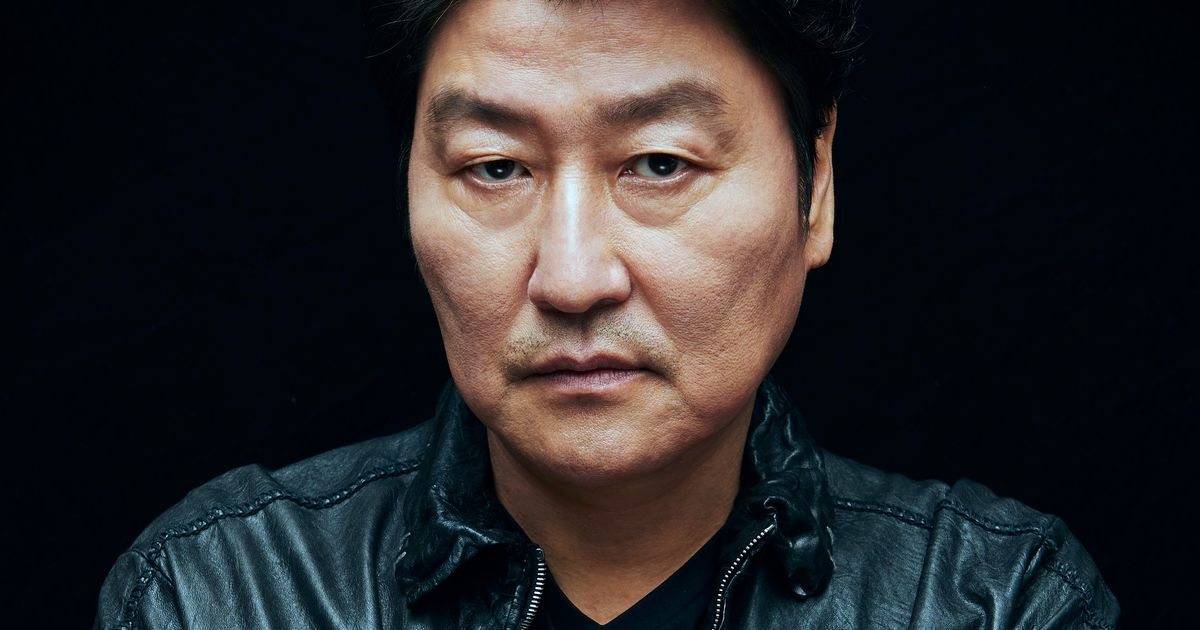

### Director of the exercise: **David Lynch**


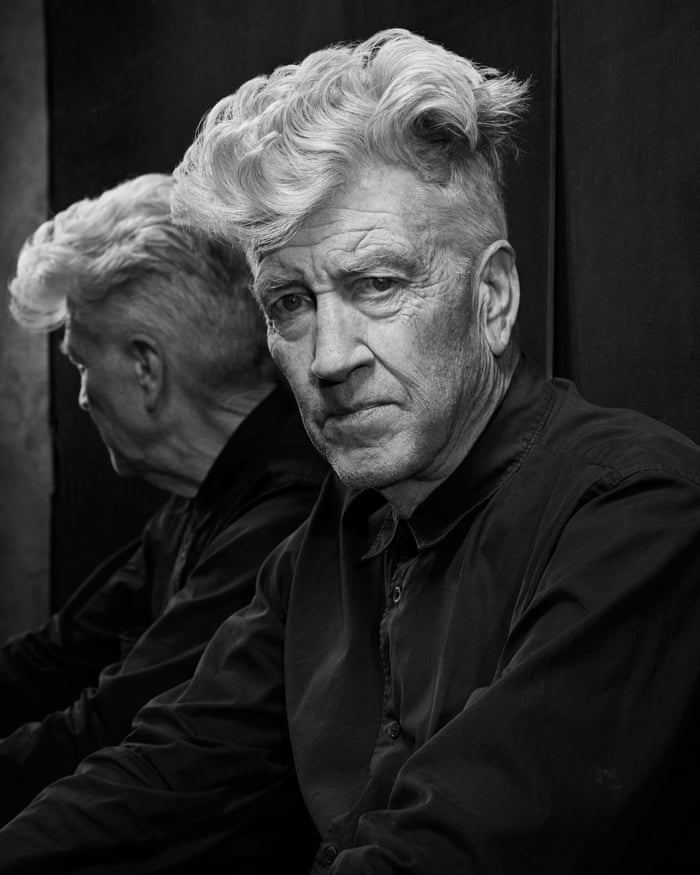

### Movie of the exercise: **The Usual Suspects**

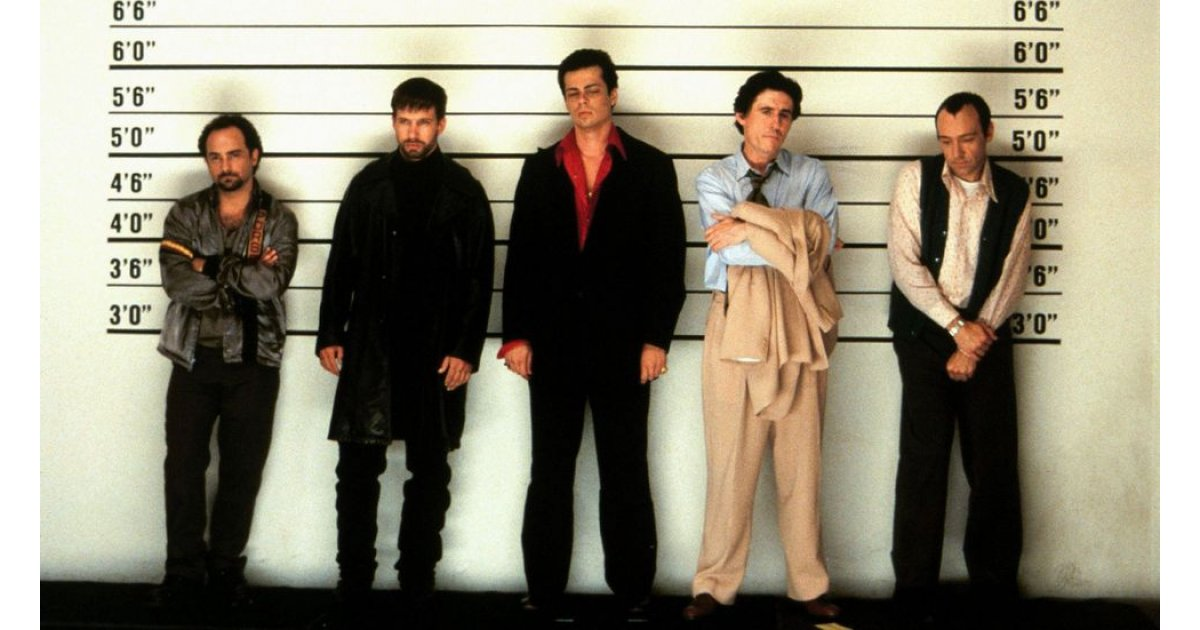

### Any suggestions by you, master?

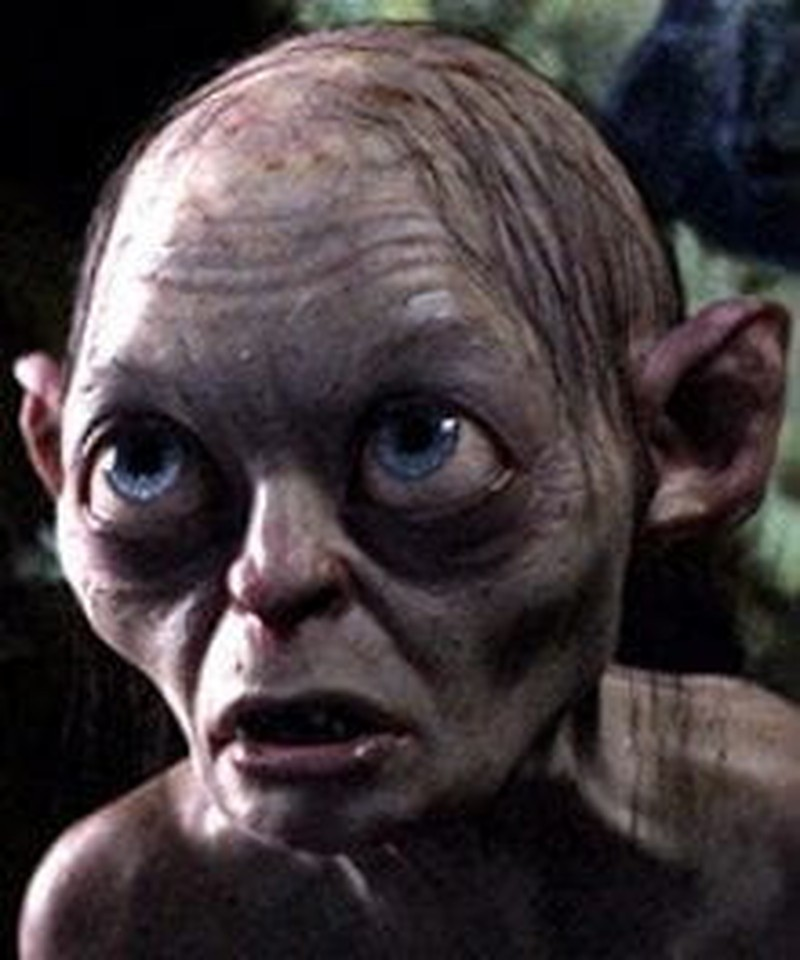